In [4]:
# Step 0: Import necessary libraries
import pandas as pd           # For data manipulation
import numpy as np            # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns            # For visualizations
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.linear_model import LinearRegression    # For Regression model
from sklearn.metrics import mean_squared_error, r2_score  # For model evaluation

# Step 1: Load the dataset
file_path = "student_dropout.csv"  # Make sure the CSV is in the same folder
data = pd.read_csv(file_path)

# Step 2: Check column names and first few rows
print("Column names:", data.columns)
print("\nFirst 5 rows:")
print(data.head())

Column names: Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

First 5 rows:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4            

In [5]:
# Step 1: Create 'average_score' column
data['average_score'] = (data['math score'] + data['reading score'] + data['writing score']) / 3

# Check the first 5 rows
print(data[['math score', 'reading score', 'writing score', 'average_score']].head())

# Step 2: Drop original score columns from features
features = data.drop(columns=['math score', 'reading score', 'writing score', 'average_score'])
target = data['average_score']

# Check first 5 rows of features
print(features.head())

# Step 3: Convert categorical columns to numeric using one-hot encoding
features_encoded = pd.get_dummies(features, drop_first=True)

# Check first 5 rows of encoded features
print(features_encoded.head())

# Step 4: Prepare X and y for the model
X = features_encoded   # Input features
y = target             # Output / target

print("\nFeature matrix X shape:", X.shape)
print("Target vector y shape:", y.shape)


   math score  reading score  writing score  average_score
0          72             72             74      72.666667
1          69             90             88      82.333333
2          90             95             93      92.666667
3          47             57             44      49.333333
4          76             78             75      76.333333
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  
0                    none  
1               completed  
2                    none  
3                    none  
4                    none  
   gender_male  race/ethnicity_group B  race/ethnicity_gr

In [6]:
# Step 1: Split the dataset into training and testing sets
# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (800, 12)
Testing set shape: (200, 12)


In [7]:
# Step 2: Create the Linear Regression model
model = LinearRegression()

# Step 3: Train the model on the training data
model.fit(X_train, y_train)

# Step 4: Make predictions on the testing set
y_pred = model.predict(X_test)

# Step 5: Check the first 10 predictions vs actual values
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(comparison.head(10))


      Actual  Predicted
0  87.000000  70.522773
1  64.000000  67.280948
2  75.000000  72.795942
3  74.666667  56.369159
4  81.666667  78.496790
5  78.000000  60.086185
6  67.333333  64.043195
7  59.000000  74.069709
8  77.333333  57.223262
9  48.666667  69.977854


In [8]:
# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) score:", r2)


Mean Squared Error (MSE): 179.60234233623538
R-squared (R2) score: 0.16217185763155217


In [12]:
import pandas as pd

# Load dataset
data = pd.read_csv("student_dropout.csv")

# Function to assign group based on two-score rule
def assign_group(row):
    scores = [row['math score'], row['reading score'], row['writing score']]
    # Count how many scores >= 70
    high_count = sum(s >= 70 for s in scores)
    mid_count = sum(50 <= s < 70 for s in scores)
    low_count = sum(s < 50 for s in scores)
    
    if high_count >= 2:
        return 'A'
    elif mid_count >= 2:
        return 'B'
    elif low_count >= 2:
        return 'C'
    else:
        # اگر هیچ شرطی برقرار نبود، نمرات پراکنده هستند، می‌توانیم آن‌ها را در گروه B قرار دهیم
        return 'B'

# Assign prep category
def categorize_prep(row):
    return 'Completed' if row['test preparation course'] == 'completed' else 'None'

data['group'] = data.apply(assign_group, axis=1)
data['prep_category'] = data.apply(categorize_prep, axis=1)

# Calculate average score for sorting inside group/prep
data['average_score'] = (data['math score'] + data['reading score'] + data['writing score']) / 3

# Map for sorting
gender_rank = {'female': 0, 'male': 1}
prep_rank = {'Completed': 0, 'None': 1}
group_order = {'A': 0, 'B': 1, 'C': 2}

data['gender_rank'] = data['gender'].map(gender_rank)
data['prep_rank'] = data['prep_category'].map(prep_rank)
data['group_rank'] = data['group'].map(group_order)

# Sort dataset: gender → group → prep → average_score descending
data_sorted = data.sort_values(
    by=['gender_rank', 'group_rank', 'prep_rank', 'average_score'],
    ascending=[True, True, True, False]
).reset_index(drop=True)

# Keep only original columns + group
columns_to_keep = [
    'gender',
    'group',
    'parental level of education',
    'lunch',
    'test preparation course',
    'math score',
    'reading score',
    'writing score'
]

data_sorted_clean = data_sorted[columns_to_keep]

# Save the sorted dataset
data_sorted_clean.to_csv("student_dropout_grouped_final_v2.csv", index=False)

print("✅ Dataset has been grouped according to the two-score rule and saved as 'student_dropout_grouped_final_v2.csv'.")


✅ Dataset has been grouped according to the two-score rule and saved as 'student_dropout_grouped_final_v2.csv'.


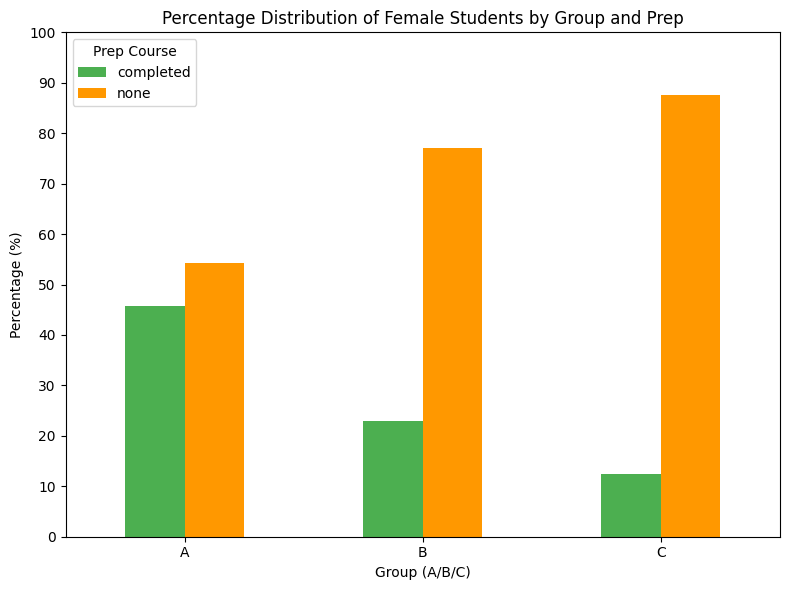

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the sorted dataset
data = pd.read_csv("student_dropout_grouped_final_v2.csv")

# Filter only female students
female_data = data[data['gender'] == 'female'].copy()

# Count number of students per group and prep
count_data = female_data.groupby(['group', 'test preparation course']).size().unstack(fill_value=0)

# Convert counts to percentages
percent_data = count_data.div(count_data.sum(axis=1), axis=0) * 100

# Plotting
colors = ['#4caf50', '#ff9800']  # Completed = green, None = orange
ax = percent_data.plot(kind='bar', stacked=False, figsize=(8,6), color=colors)

plt.title("Percentage Distribution of Female Students by Group and Prep")
plt.ylabel("Percentage (%)")
plt.xlabel("Group (A/B/C)")
plt.ylim(0, 100)
plt.xticks(rotation=0)
plt.legend(title="Prep Course")
plt.yticks(np.arange(0, 101, 10))  # Y-axis ticks from 0 to 100 with step 10

plt.tight_layout()

# Save the plot as PNG
plt.savefig("female_grouped_distribution.png", dpi=300)

# Show the plot
plt.show()


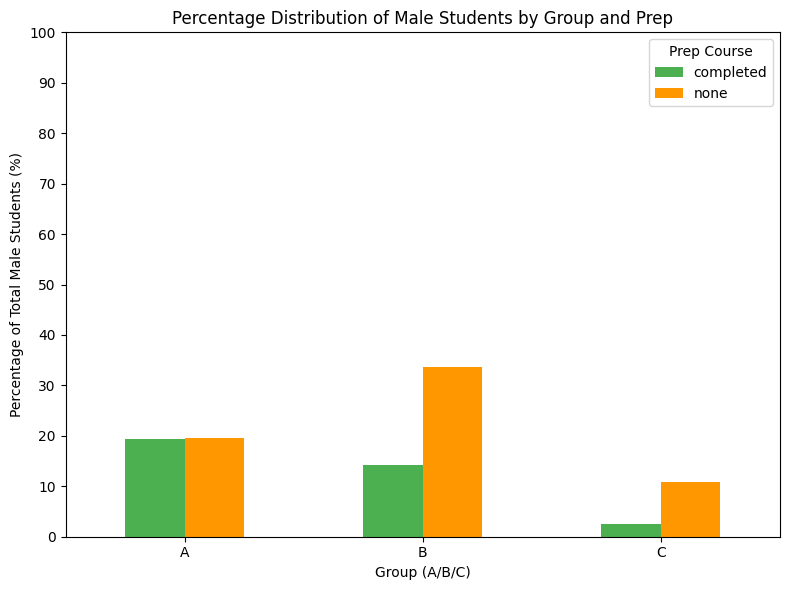

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the sorted dataset
data = pd.read_csv("student_dropout_grouped_final_v2.csv")

# Filter only male students
male_data = data[data['gender'] == 'male'].copy()

# Count number of students per group and prep
count_data = male_data.groupby(['group', 'test preparation course']).size().unstack(fill_value=0)

# Convert counts to percentage of total male students
percent_data = (count_data / count_data.values.sum()) * 100

# Plotting
colors = ['#4caf50', '#ff9800']  # Completed = green, None = orange
ax = percent_data.plot(kind='bar', stacked=False, figsize=(8,6), color=colors)

plt.title("Percentage Distribution of Male Students by Group and Prep")
plt.ylabel("Percentage of Total Male Students (%)")
plt.xlabel("Group (A/B/C)")
plt.ylim(0, 100)
plt.xticks(rotation=0)
plt.legend(title="Prep Course")
plt.yticks(np.arange(0, 101, 10))  # Y-axis ticks from 0 to 100 with step 10
plt.tight_layout()

# Save the plot as PNG
plt.savefig("male_grouped_distribution.png", dpi=300)

# Show the plot
plt.show()


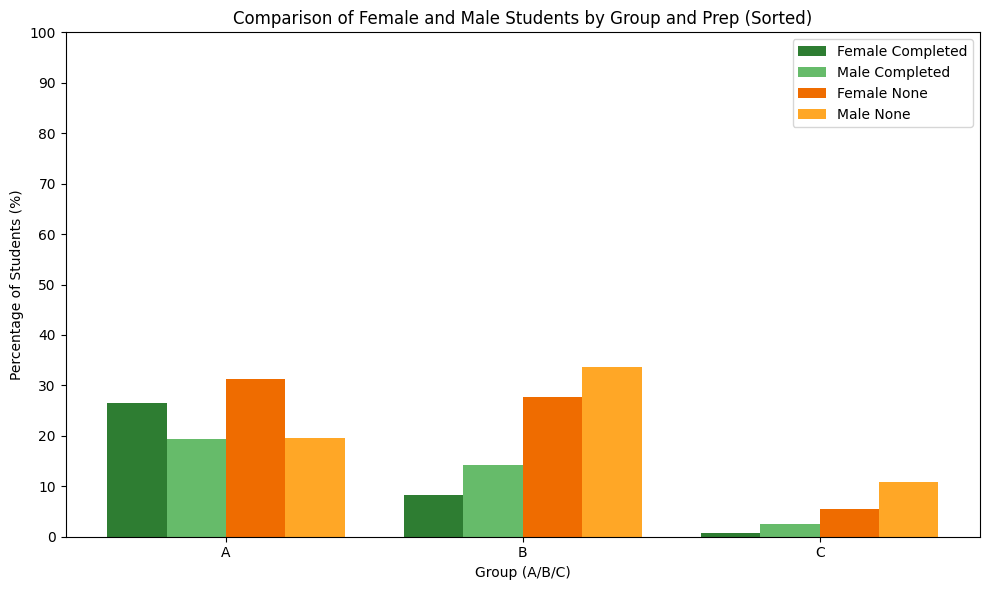

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
data = pd.read_csv("student_dropout_grouped_final_v2.csv")

# Groups order
groups = ['A', 'B', 'C']

# Prepare percentage data
def get_percent(df, gender, prep):
    subset = df[(df['gender'] == gender) & (df['test preparation course'] == prep)]
    total = len(df[df['gender'] == gender])
    counts = subset.groupby('group').size()
    return [100*counts.get(g,0)/total for g in groups]

# Percentages for each category
female_completed = get_percent(data, 'female', 'completed')
male_completed = get_percent(data, 'male', 'completed')
female_none = get_percent(data, 'female', 'none')
male_none = get_percent(data, 'male', 'none')

# X positions
x = np.arange(len(groups))
width = 0.2  # width of each bar

# Plot
fig, ax = plt.subplots(figsize=(10,6))

# Plot bars with order: Female Completed, Male Completed, Female None, Male None
ax.bar(x - 1.5*width, female_completed, width, label='Female Completed', color='#2e7d32')
ax.bar(x - 0.5*width, male_completed, width, label='Male Completed', color='#66bb6a')
ax.bar(x + 0.5*width, female_none, width, label='Female None', color='#ef6c00')
ax.bar(x + 1.5*width, male_none, width, label='Male None', color='#ffa726')

# Labels and titles
ax.set_xlabel("Group (A/B/C)")
ax.set_ylabel("Percentage of Students (%)")
ax.set_title("Comparison of Female and Male Students by Group and Prep (Sorted)")
ax.set_xticks(x)
ax.set_xticklabels(groups)
ax.set_ylim(0, 100)
ax.legend()
plt.yticks(np.arange(0, 101, 10))  # Y-axis ticks from 0 to 100 with step 10

plt.tight_layout()

# Save figure
plt.savefig("comparison_sorted_female_male.png", dpi=300)

# Show plot
plt.show()


In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Load dataset
# -----------------------------
data = pd.read_csv("student_dropout_grouped_final_v2.csv")

# -----------------------------
# Create folder for plots
# -----------------------------
plot_folder = "plots"
if not os.path.exists(plot_folder):
    os.makedirs(plot_folder)

# -----------------------------
# Groups order
# -----------------------------
groups = ['A', 'B', 'C']

# -----------------------------
# Function to calculate percentage per group for a given gender and prep
# -----------------------------
def get_percent(df, gender, prep):
    subset = df[(df['gender'] == gender) & (df['test preparation course'] == prep)]
    total = len(df[df['gender'] == gender])
    counts = subset.groupby('group').size()
    return [100*counts.get(g,0)/total for g in groups]

# -----------------------------
# Plot function for a single gender
# -----------------------------
def plot_gender(df, gender, folder):
    completed = get_percent(df, gender, 'completed')
    none = get_percent(df, gender, 'none')
    
    x = np.arange(len(groups))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(8,5))
    
    bars1 = ax.bar(x - width/2, completed, width, label='Completed', color='#2e7d32')
    bars2 = ax.bar(x + width/2, none, width, label='None', color='#ef6c00')
    
    # Add value labels
    for bar_group in [bars1, bars2]:
        for bar in bar_group:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 1,
                    f'{height:.1f}%', ha='center', va='bottom', fontsize=9)
    
    # Labels and title
    ax.set_xlabel("Group (A/B/C)")
    ax.set_ylabel("Percentage of Students (%)")
    ax.set_title(f"{gender.capitalize()} Students Distribution by Group and Prep")
    ax.set_xticks(x)
    ax.set_xticklabels(groups)
    ax.set_ylim(0, 100)
    plt.yticks(np.arange(0, 101, 10))
    ax.legend()
    plt.tight_layout()
    
    # Save plot
    file_name = f"{gender}_grouped_distribution.png"
    plot_path = os.path.join(folder, file_name)
    plt.savefig(plot_path, dpi=300)
    plt.close()
    print(f"{gender.capitalize()} plot saved: {plot_path}")

# -----------------------------
# Plot function for comparison chart
# -----------------------------
def plot_comparison(df, folder):
    female_completed = get_percent(df, 'female', 'completed')
    male_completed = get_percent(df, 'male', 'completed')
    female_none = get_percent(df, 'female', 'none')
    male_none = get_percent(df, 'male', 'none')

    x = np.arange(len(groups))
    width = 0.2

    fig, ax = plt.subplots(figsize=(10,6))
    bars = []
    bars.append(ax.bar(x - 1.5*width, female_completed, width, label='Female Completed', color='#2e7d32'))
    bars.append(ax.bar(x - 0.5*width, male_completed, width, label='Male Completed', color='#66bb6a'))
    bars.append(ax.bar(x + 0.5*width, female_none, width, label='Female None', color='#ef6c00'))
    bars.append(ax.bar(x + 1.5*width, male_none, width, label='Male None', color='#ffa726'))

    # Add value labels
    for bar_group in bars:
        for bar in bar_group:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 1,
                    f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

    # Labels and title
    ax.set_xlabel("Group (A/B/C)")
    ax.set_ylabel("Percentage of Students (%)")
    ax.set_title("Comparison of Female and Male Students by Group and Prep")
    ax.set_xticks(x)
    ax.set_xticklabels(groups)
    ax.set_ylim(0, 100)
    plt.yticks(np.arange(0, 101, 10))
    ax.legend()
    plt.tight_layout()

    # Save plot
    plot_path = os.path.join(folder, "comparison_sorted_female_male.png")
    plt.savefig(plot_path, dpi=300)
    plt.close()
    print(f"Comparison plot saved: {plot_path}")

# -----------------------------
# Generate all plots
# -----------------------------
plot_gender(data, 'female', plot_folder)
plot_gender(data, 'male', plot_folder)
plot_comparison(data, plot_folder)


Female plot saved: plots\female_grouped_distribution.png
Male plot saved: plots\male_grouped_distribution.png
Comparison plot saved: plots\comparison_sorted_female_male.png
